# Lambda=4: EffSU2/TwoLocal - Results processing

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
def get_last_val(df):
    val_list = []
    name_list = []
    for i in range(len(df.columns)):
        lv = df[df.columns[i]].dropna().to_numpy()[-1]
        val_list.append(np.round(lv,5))
        name_list.append(df.columns[i])
    return name_list, val_list

def plot_e(df, ax):
    for i in range(len(df.columns)):
        ax.plot(np.arange(len(df[df.columns[i]])),df[df.columns[i]],
                color = color_list[i], 
                 label=df.columns[i])
        

In [3]:
su2_ansatz = ['effsu2_Ry_c', 'effsu2_Rz_c', 'effsu2_RyRz_c', 'effsu2_RyY_c',
             'effsu2_Ry_f', 'effsu2_Rz_f', 'effsu2_RyRz_f', 'effsu2_RyY_f']
tl_ansatz = ['tl_Ry_c', 'tl_Rz_c', 'tl_RyRz_c', 'tl_RyY_c',
             'tl_Ry_f', 'tl_Rz_f', 'tl_RyRz_f', 'tl_RyY_f']

# lambda = 0.2

In [4]:
E_02 = 3.13406
df_02_cs= pd.read_csv('results/qve_l4_l=0.2_effsu2_cobyla.csv')
df_02_ct= pd.read_csv('results/qve_l4_l=0.2_twolocal_cobyla.csv')
df_02_ss= pd.read_csv('results/qve_l4_l=0.2_effsu2_spsa.csv')
df_02_st= pd.read_csv('results/qve_l4_l=0.2_twolocal_spsa.csv')

In [5]:
df_02_cs.drop(['Unnamed: 0'], axis = 1, inplace=True)
df_02_cs.columns = su2_ansatz

df_02_ct.drop(['Unnamed: 0'], axis = 1, inplace=True)
df_02_ct.columns = tl_ansatz

df_02_ss.drop(['Unnamed: 0'], axis = 1, inplace=True)
df_02_ss.columns = su2_ansatz

df_02_st.drop(['Unnamed: 0'], axis = 1, inplace=True)
df_02_st.columns = tl_ansatz

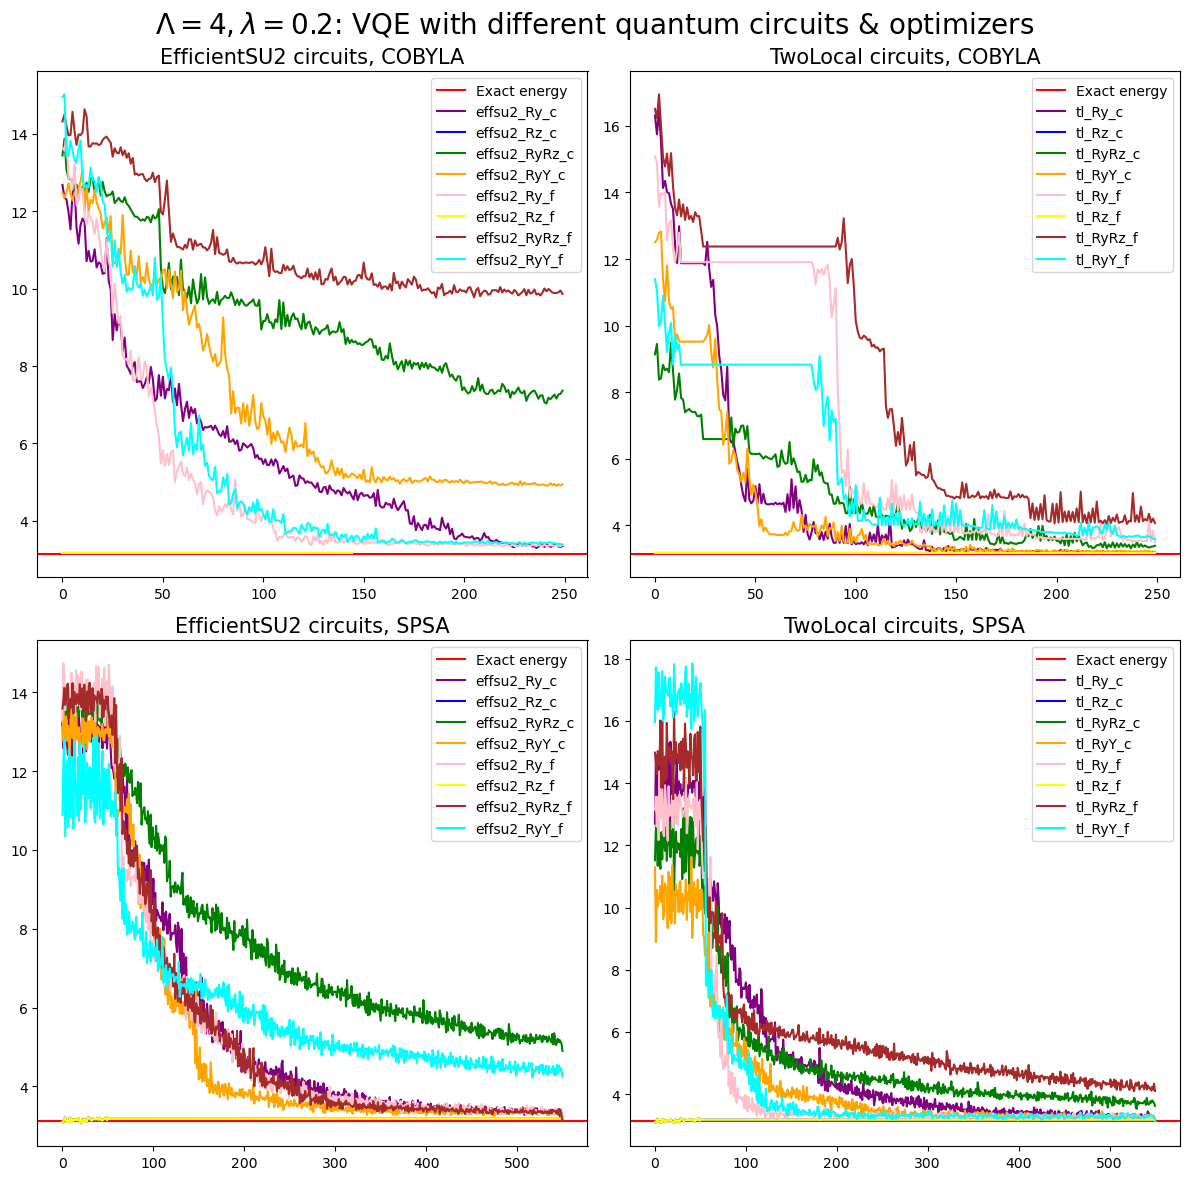

In [21]:
fig, ax = plt.subplots(2,2, figsize=(12,12), tight_layout = True)
color_list = ['purple', 'blue', 'green', 'orange', 'pink', 'yellow', 'brown', 'cyan']

ax[0,0].axhline(E_02, color = 'red',  label = 'Exact energy')
plot_e(df_02_cs, ax[0,0])
#plt.ylim([3.35, 3.4])
ax[0,0].set_title('EfficientSU2 circuits, COBYLA', fontsize = 15)
ax[0,0].legend()

ax[0,1].axhline(E_02, color = 'red',  label = 'Exact energy')
plot_e(df_02_ct, ax[0,1])
#plt.ylim([3.35, 3.4])
ax[0,1].set_title('TwoLocal circuits, COBYLA', fontsize = 15)
ax[0,1].legend()

ax[1,0].axhline(E_02, color = 'red',  label = 'Exact energy')
plot_e(df_02_ss, ax[1,0])
#plt.ylim([3.35, 3.4])
ax[1,0].set_title('EfficientSU2 circuits, SPSA', fontsize = 15)
ax[1,0].legend()

ax[1,1].axhline(E_02, color = 'red',  label = 'Exact energy')
plot_e(df_02_st, ax[1,1])
#plt.ylim([3.35, 3.4])
ax[1,1].set_title('TwoLocal circuits, SPSA', fontsize = 15)
ax[1,1].legend()

plt.suptitle('$\Lambda=4, \lambda=0.2$: VQE with different quantum circuits & optimizers', fontsize = 20)
plt.savefig('L=4_l=02_convergence_curves.png')

In [9]:
ns1, vs1 = get_last_val(df_02_cs)
nt1, vt1 = get_last_val(df_02_ct)

ns2, vs2 = get_last_val(df_02_ss)
nt2, vt2 = get_last_val(df_02_st)
print(f'cobyla, effsu2:\n {ns1}\n {vs1}\n')
print(f'cobyla, twolocal: \n{nt1}\n {vt1}\n')
print(f'spsa, effsu2: \n{ns2}\n {vs2}\n')
print(f'spsa, twolocal: \n{nt2}\n {vt2}\n')

cobyla, effsu2:
 ['effsu2_Ry_c', 'effsu2_Rz_c', 'effsu2_RyRz_c', 'effsu2_RyY_c', 'effsu2_Ry_f', 'effsu2_Rz_f', 'effsu2_RyRz_f', 'effsu2_RyY_f']
 [3.3445, 3.1791, 7.35898, 4.93931, 3.37026, 3.1791, 9.85983, 3.38528]

cobyla, twolocal: 
['tl_Ry_c', 'tl_Rz_c', 'tl_RyRz_c', 'tl_RyY_c', 'tl_Ry_f', 'tl_Rz_f', 'tl_RyRz_f', 'tl_RyY_f']
 [3.18228, 3.1791, 3.3894, 3.21248, 3.49465, 3.1791, 4.07165, 3.58869]

spsa, effsu2: 
['effsu2_Ry_c', 'effsu2_Rz_c', 'effsu2_RyRz_c', 'effsu2_RyY_c', 'effsu2_Ry_f', 'effsu2_Rz_f', 'effsu2_RyRz_f', 'effsu2_RyY_f']
 [3.23204, 3.1791, 4.89771, 3.14605, 3.19555, 3.1791, 3.11959, 4.24528]

spsa, twolocal: 
['tl_Ry_c', 'tl_Rz_c', 'tl_RyRz_c', 'tl_RyY_c', 'tl_Ry_f', 'tl_Rz_f', 'tl_RyRz_f', 'tl_RyY_f']
 [3.18339, 3.1791, 3.62318, 3.13679, 3.16617, 3.1791, 4.10208, 3.14366]



In [10]:
l02_cn = np.concatenate((ns1, nt1), axis = 0)
l02_cv = np.concatenate((vs1, vt1), axis = 0)
l02_sn = np.concatenate((ns2, nt2), axis = 0)
l02_sv = np.concatenate((vs2, vt2), axis = 0)

df_l02 = pd.DataFrame({'name': l02_cn, 'cobyla_values': l02_cv, 'spsa_values': l02_sv})
df_l02.set_index('name', inplace = True)

df_l02.to_csv('l0.2_last_val.csv')
df_l02

,cobyla_values,spsa_values
name,,
effsu2_Ry_c,3.34450,3.23204
effsu2_Rz_c,3.17910,3.17910
effsu2_RyRz_c,7.35898,4.89771
effsu2_RyY_c,4.93931,3.14605
effsu2_Ry_f,3.37026,3.19555
effsu2_Rz_f,3.17910,3.17910
effsu2_RyRz_f,9.85983,3.11959
effsu2_RyY_f,3.38528,4.24528
tl_Ry_c,3.18228,3.18339


# lambda = 0.5

In [4]:
E_05 =3.29894
df_05_cs= pd.read_csv('results/qve_l4_l=0.5_effsu2_cobyla.csv')
df_05_ct= pd.read_csv('results/qve_l4_l=0.5_twolocal_cobyla.csv')
df_05_ss= pd.read_csv('results/qve_l4_l=0.5_effsu2_spsa.csv')
df_05_st= pd.read_csv('results/qve_l4_l=0.5_twolocal_spsa.csv')

In [5]:
df_05_cs.drop(['Unnamed: 0'], axis = 1, inplace=True)
df_05_cs.columns = su2_ansatz

df_05_ct.drop(['Unnamed: 0'], axis = 1, inplace=True)
df_05_ct.columns = tl_ansatz

df_05_ss.drop(['Unnamed: 0'], axis = 1, inplace=True)
df_05_ss.columns = su2_ansatz

df_05_st.drop(['Unnamed: 0'], axis = 1, inplace=True)
df_05_st.columns = tl_ansatz

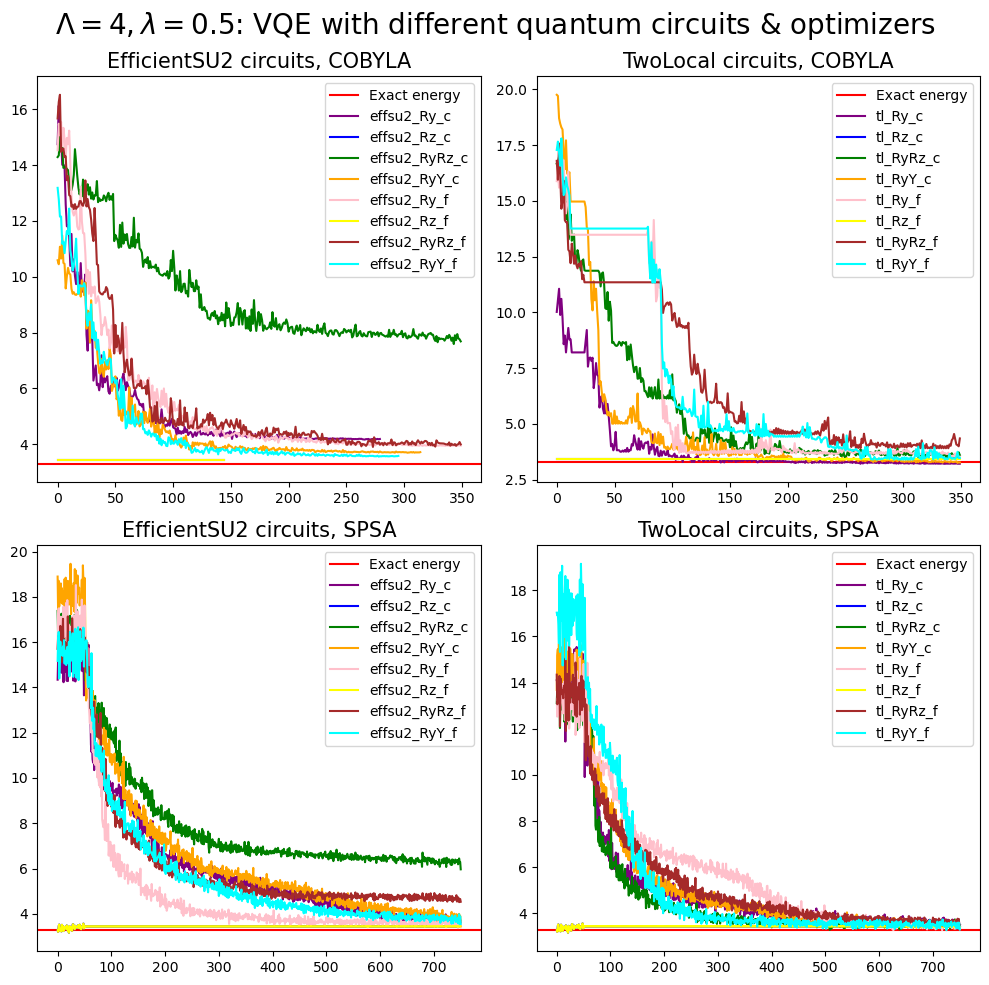

In [6]:
fig, ax = plt.subplots(2,2, figsize=(10,10), tight_layout = True)
color_list = ['purple', 'blue', 'green', 'orange', 'pink', 'yellow', 'brown', 'cyan']

ax[0,0].axhline(E_05, color = 'red',  label = 'Exact energy')
plot_e(df_05_cs, ax[0,0])
#plt.ylim([3.35, 3.4])
ax[0,0].set_title('EfficientSU2 circuits, COBYLA', fontsize = 15)
ax[0,0].legend()

ax[0,1].axhline(E_05, color = 'red',  label = 'Exact energy')
plot_e(df_05_ct, ax[0,1])
#plt.ylim([3.35, 3.4])
ax[0,1].set_title('TwoLocal circuits, COBYLA', fontsize = 15)
ax[0,1].legend()

ax[1,0].axhline(E_05, color = 'red',  label = 'Exact energy')
plot_e(df_05_ss, ax[1,0])
#plt.ylim([3.35, 3.4])
ax[1,0].set_title('EfficientSU2 circuits, SPSA', fontsize = 15)
ax[1,0].legend()

ax[1,1].axhline(E_05, color = 'red',  label = 'Exact energy')
plot_e(df_05_st, ax[1,1])
#plt.ylim([3.35, 3.4])
ax[1,1].set_title('TwoLocal circuits, SPSA', fontsize = 15)
ax[1,1].legend()

plt.suptitle('$\Lambda=4, \lambda=0.5$: VQE with different quantum circuits & optimizers', fontsize = 20)
plt.savefig('L=4_l=05_convergence_curves.png')

In [17]:
ns1, vs1 = get_last_val(df_05_cs)
nt1, vt1 = get_last_val(df_05_ct)
ns2, vs2 = get_last_val(df_05_ss)
nt2, vt2 = get_last_val(df_05_st)
print(f'cobyla, effsu2:\n {ns1}\n {vs1}\n')
print(f'cobyla, twolocal: \n{nt1}\n {vt1}\n')
print(f'spsa, effsu2: \n{ns2}\n {vs2}\n')
print(f'spsa, twolocal: \n{nt2}\n {vt2}\n')

cobyla, effsu2:
 ['effsu2_Ry_c', 'effsu2_Rz_c', 'effsu2_RyRz_c', 'effsu2_RyY_c', 'effsu2_Ry_f', 'effsu2_Rz_f', 'effsu2_RyRz_f', 'effsu2_RyY_f']
 [4.1883, 3.44775, 7.68608, 3.71764, 3.95226, 3.44775, 3.99438, 3.58207]

cobyla, twolocal: 
['tl_Ry_c', 'tl_Rz_c', 'tl_RyRz_c', 'tl_RyY_c', 'tl_Ry_f', 'tl_Rz_f', 'tl_RyRz_f', 'tl_RyY_f']
 [3.21974, 3.44775, 3.60629, 3.27478, 3.53397, 3.44775, 4.35256, 3.47803]

spsa, effsu2: 
['effsu2_Ry_c', 'effsu2_Rz_c', 'effsu2_RyRz_c', 'effsu2_RyY_c', 'effsu2_Ry_f', 'effsu2_Rz_f', 'effsu2_RyRz_f', 'effsu2_RyY_f']
 [3.61873, 3.44775, 5.96494, 3.66239, 3.40536, 3.44775, 4.53325, 3.5538]

spsa, twolocal: 
['tl_Ry_c', 'tl_Rz_c', 'tl_RyRz_c', 'tl_RyY_c', 'tl_Ry_f', 'tl_Rz_f', 'tl_RyRz_f', 'tl_RyY_f']
 [3.49978, 3.44775, 3.39842, 3.38926, 3.32111, 3.44775, 3.50001, 3.30641]



In [18]:
l05_cn = np.concatenate((ns1, nt1), axis = 0)
l05_cv = np.concatenate((vs1, vt1), axis = 0)
l05_sn = np.concatenate((ns2, nt2), axis = 0)
l05_sv = np.concatenate((vs2, vt2), axis = 0)

df_l05 = pd.DataFrame({'name': l05_cn, 'cobyla_values': l05_cv, 'spsa_values': l05_sv})
df_l05.set_index('name', inplace = True)

df_l05.to_csv('l0.5_last_val.csv')
df_l05

,cobyla_values,spsa_values
name,,
effsu2_Ry_c,4.18830,3.61873
effsu2_Rz_c,3.44775,3.44775
effsu2_RyRz_c,7.68608,5.96494
effsu2_RyY_c,3.71764,3.66239
effsu2_Ry_f,3.95226,3.40536
effsu2_Rz_f,3.44775,3.44775
effsu2_RyRz_f,3.99438,4.53325
effsu2_RyY_f,3.58207,3.55380
tl_Ry_c,3.21974,3.49978


# lambda = 1.0

In [7]:
E_10 = 3.52625
df_10_cs= pd.read_csv('results/qve_l4_l=1.0_effsu2_cobyla.csv')
df_10_ct= pd.read_csv('results/qve_l4_l=1.0_twolocal_cobyla.csv')
df_10_ss= pd.read_csv('results/qve_l4_l=1.0_effsu2_spsa.csv')
df_10_st= pd.read_csv('results/qve_l4_l=1.0_twolocal_spsa.csv')

In [8]:
df_10_cs.drop(['Unnamed: 0'], axis = 1, inplace=True)
df_10_cs.columns = su2_ansatz

df_10_ct.drop(['Unnamed: 0'], axis = 1, inplace=True)
df_10_ct.columns = tl_ansatz

df_10_ss.drop(['Unnamed: 0'], axis = 1, inplace=True)
df_10_ss.columns = su2_ansatz

df_10_st.drop(['Unnamed: 0'], axis = 1, inplace=True)
df_10_st.columns = tl_ansatz

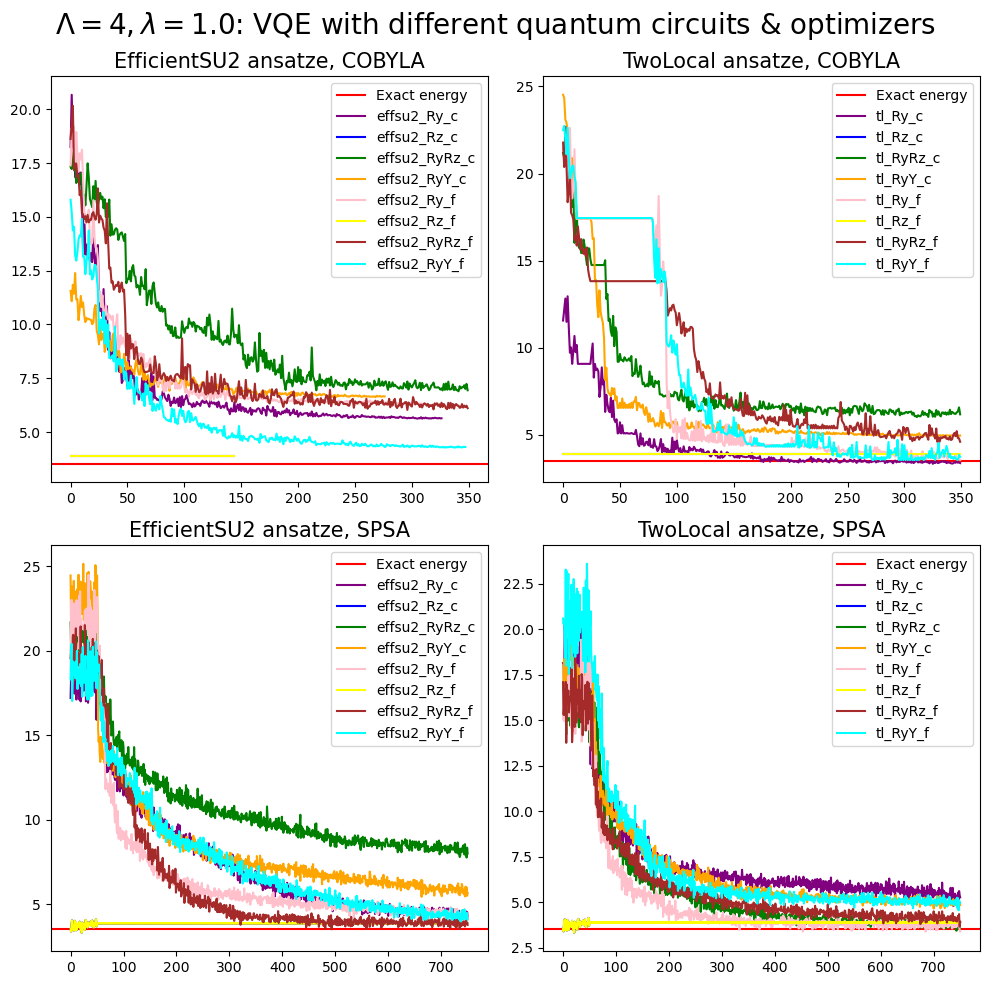

In [9]:
fig, ax = plt.subplots(2,2, figsize=(10,10), tight_layout = True)
color_list = ['purple', 'blue', 'green', 'orange', 'pink', 'yellow', 'brown', 'cyan']

ax[0,0].axhline(E_10, color = 'red',  label = 'Exact energy')
plot_e(df_10_cs, ax[0,0])
#plt.ylim([3.35, 3.4])
ax[0,0].set_title('EfficientSU2 ansatze, COBYLA', fontsize = 15)
ax[0,0].legend()

ax[0,1].axhline(E_10, color = 'red',  label = 'Exact energy')
plot_e(df_10_ct, ax[0,1])
#plt.ylim([3.35, 3.4])
ax[0,1].set_title('TwoLocal ansatze, COBYLA', fontsize = 15)
ax[0,1].legend()

ax[1,0].axhline(E_10, color = 'red',  label = 'Exact energy')
plot_e(df_10_ss, ax[1,0])
#plt.ylim([3.35, 3.4])
ax[1,0].set_title('EfficientSU2 ansatze, SPSA', fontsize = 15)
ax[1,0].legend()

ax[1,1].axhline(E_10, color = 'red',  label = 'Exact energy')
plot_e(df_10_st, ax[1,1])
#plt.ylim([3.35, 3.4])
ax[1,1].set_title('TwoLocal ansatze, SPSA', fontsize = 15)
ax[1,1].legend()

plt.suptitle('$\Lambda=4, \lambda=1.0$: VQE with different quantum circuits & optimizers', fontsize = 20)
plt.savefig('L=4_l=10_convergence_curves.png')

In [23]:
ns1, vs1 = get_last_val(df_10_cs)
nt1, vt1 = get_last_val(df_10_ct)
ns2, vs2 = get_last_val(df_10_ss)
nt2, vt2 = get_last_val(df_10_st)
print(f'cobyla, effsu2:\n {ns1}\n {vs1}\n')
print(f'cobyla, twolocal: \n{nt1}\n {vt1}\n')
print(f'spsa, effsu2: \n{ns2}\n {vs2}\n')
print(f'spsa, twolocal: \n{nt2}\n {vt2}\n')

cobyla, effsu2:
 ['effsu2_Ry_c', 'effsu2_Rz_c', 'effsu2_RyRz_c', 'effsu2_RyY_c', 'effsu2_Ry_f', 'effsu2_Rz_f', 'effsu2_RyRz_f', 'effsu2_RyY_f']
 [5.64314, 3.8955, 6.94346, 6.65659, 6.30709, 3.8955, 6.11065, 4.30899]

cobyla, twolocal: 
['tl_Ry_c', 'tl_Rz_c', 'tl_RyRz_c', 'tl_RyY_c', 'tl_Ry_f', 'tl_Rz_f', 'tl_RyRz_f', 'tl_RyY_f']
 [3.38649, 3.8955, 6.18099, 4.96284, 3.56694, 3.8955, 4.60628, 3.74414]

spsa, effsu2: 
['effsu2_Ry_c', 'effsu2_Rz_c', 'effsu2_RyRz_c', 'effsu2_RyY_c', 'effsu2_Ry_f', 'effsu2_Rz_f', 'effsu2_RyRz_f', 'effsu2_RyY_f']
 [4.22957, 3.8955, 8.01018, 5.6767, 4.19845, 3.8955, 3.78857, 4.10703]

spsa, twolocal: 
['tl_Ry_c', 'tl_Rz_c', 'tl_RyRz_c', 'tl_RyY_c', 'tl_Ry_f', 'tl_Rz_f', 'tl_RyRz_f', 'tl_RyY_f']
 [5.26669, 3.8955, 3.55374, 4.83891, 3.3941, 3.8955, 3.92772, 4.97329]



In [24]:
l10_cn = np.concatenate((ns1, nt1), axis = 0)
l10_cv = np.concatenate((vs1, vt1), axis = 0)
l10_sn = np.concatenate((ns2, nt2), axis = 0)
l10_sv = np.concatenate((vs2, vt2), axis = 0)

df_l10 = pd.DataFrame({'name': l10_cn, 'cobyla_values': l10_cv, 'spsa_values': l10_sv})
df_l10.set_index('name', inplace = True)

df_l10.to_csv('l1.0_last_val.csv')
df_l10

,cobyla_values,spsa_values
name,,
effsu2_Ry_c,5.64314,4.22957
effsu2_Rz_c,3.89550,3.89550
effsu2_RyRz_c,6.94346,8.01018
effsu2_RyY_c,6.65659,5.67670
effsu2_Ry_f,6.30709,4.19845
effsu2_Rz_f,3.89550,3.89550
effsu2_RyRz_f,6.11065,3.78857
effsu2_RyY_f,4.30899,4.10703
tl_Ry_c,3.38649,5.26669


# lambda =2.0

In [25]:
E_20 = 3.89548

df_20_cs= pd.read_csv('results/qve_l4_l=2.0_effsu2_cobyla.csv')
df_20_ct= pd.read_csv('results/qve_l4_l=2.0_twolocal_cobyla.csv')
df_20_ss= pd.read_csv('results/qve_l4_l=2.0_effsu2_spsa.csv')
df_20_st= pd.read_csv('results/qve_l4_l=2.0_twolocal_spsa.csv')

In [26]:
df_20_cs.drop(['Unnamed: 0'], axis = 1, inplace=True)
df_20_cs.columns = su2_ansatz

df_20_ct.drop(['Unnamed: 0'], axis = 1, inplace=True)
df_20_ct.columns = tl_ansatz

df_20_ss.drop(['Unnamed: 0'], axis = 1, inplace=True)
df_20_ss.columns = su2_ansatz

df_20_st.drop(['Unnamed: 0'], axis = 1, inplace=True)
df_20_st.columns = tl_ansatz

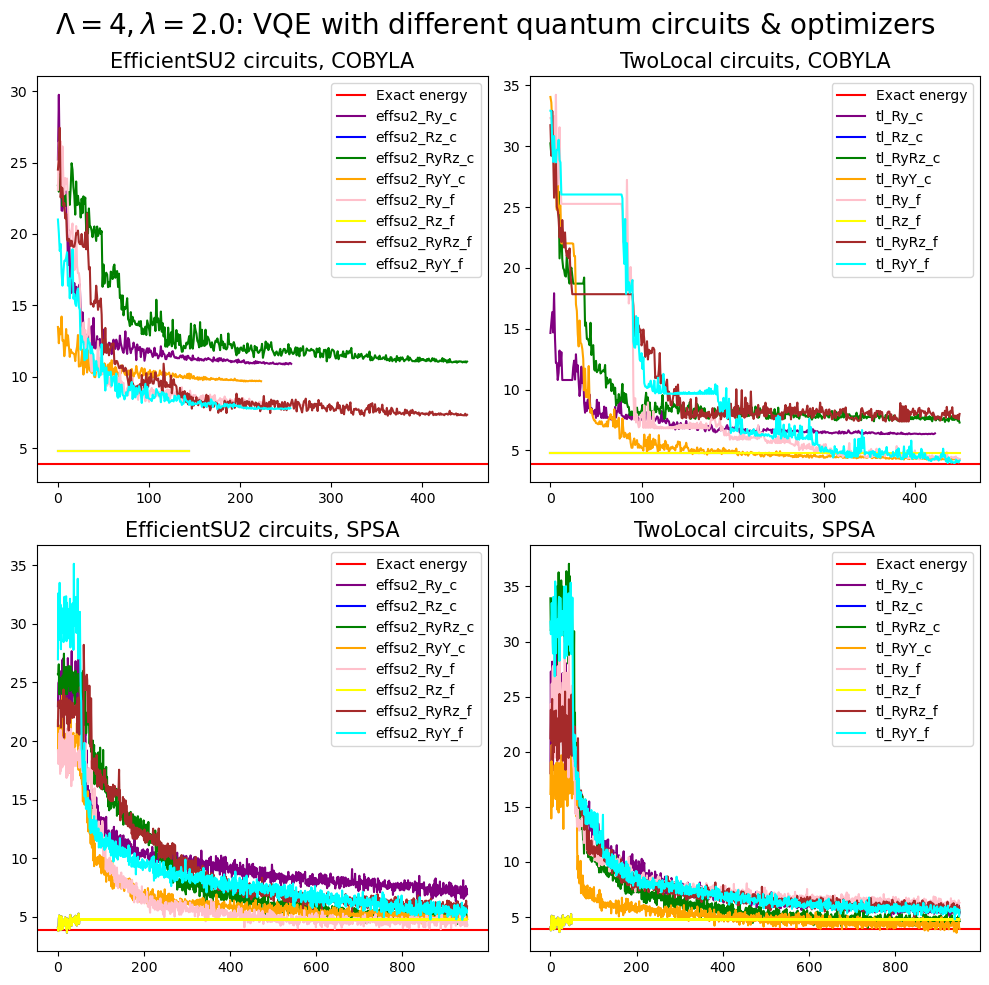

In [28]:
fig, ax = plt.subplots(2,2, figsize=(10,10), tight_layout = True)
color_list = ['purple', 'blue', 'green', 'orange', 'pink', 'yellow', 'brown', 'cyan']

ax[0,0].axhline(E_20, color = 'red',  label = 'Exact energy')
plot_e(df_20_cs, ax[0,0])
#plt.ylim([3.35, 3.4])
ax[0,0].set_title('EfficientSU2 circuits, COBYLA',fontsize=15)
ax[0,0].legend()

ax[0,1].axhline(E_20, color = 'red',  label = 'Exact energy')
plot_e(df_20_ct, ax[0,1])
#plt.ylim([3.35, 3.4])
ax[0,1].set_title('TwoLocal circuits, COBYLA',fontsize=15)
ax[0,1].legend()

ax[1,0].axhline(E_20, color = 'red',  label = 'Exact energy')
plot_e(df_20_ss, ax[1,0])
#plt.ylim([3.35, 3.4])
ax[1,0].set_title('EfficientSU2 circuits, SPSA',fontsize=15)
ax[1,0].legend()

ax[1,1].axhline(E_20, color = 'red',  label = 'Exact energy')
plot_e(df_20_st, ax[1,1])
#plt.ylim([3.35, 3.4])
ax[1,1].set_title('TwoLocal circuits, SPSA',fontsize=15)
ax[1,1].legend()

plt.suptitle('$\Lambda=4, \lambda=2.0$: VQE with different quantum circuits & optimizers', fontsize = 20)
plt.savefig('L=4_l=20_convergence_curves.png')

In [29]:
ns1, vs1 = get_last_val(df_20_cs)
nt1, vt1 = get_last_val(df_20_ct)
ns2, vs2 = get_last_val(df_20_ss)
nt2, vt2 = get_last_val(df_20_st)
print(f'cobyla, effsu2:\n {ns1}\n {vs1}\n')
print(f'cobyla, twolocal: \n{nt1}\n {vt1}\n')
print(f'spsa, effsu2: \n{ns2}\n {vs2}\n')
print(f'spsa, twolocal: \n{nt2}\n {vt2}\n')

cobyla, effsu2:
 ['effsu2_Ry_c', 'effsu2_Rz_c', 'effsu2_RyRz_c', 'effsu2_RyY_c', 'effsu2_Ry_f', 'effsu2_Rz_f', 'effsu2_RyRz_f', 'effsu2_RyY_f']
 [10.89956, 4.791, 11.05988, 9.68253, 8.01434, 4.791, 7.32845, 7.79339]

cobyla, twolocal: 
['tl_Ry_c', 'tl_Rz_c', 'tl_RyRz_c', 'tl_RyY_c', 'tl_Ry_f', 'tl_Rz_f', 'tl_RyRz_f', 'tl_RyY_f']
 [6.39657, 4.791, 7.28931, 4.26378, 4.29829, 4.791, 7.99626, 4.16062]

spsa, effsu2: 
['effsu2_Ry_c', 'effsu2_Rz_c', 'effsu2_RyRz_c', 'effsu2_RyY_c', 'effsu2_Ry_f', 'effsu2_Rz_f', 'effsu2_RyRz_f', 'effsu2_RyY_f']
 [6.92786, 4.791, 4.32874, 4.94393, 4.2067, 4.791, 5.87643, 5.54155]

spsa, twolocal: 
['tl_Ry_c', 'tl_Rz_c', 'tl_RyRz_c', 'tl_RyY_c', 'tl_Ry_f', 'tl_Rz_f', 'tl_RyRz_f', 'tl_RyY_f']
 [5.45181, 4.791, 4.61735, 3.94466, 6.29251, 4.791, 5.4299, 5.61301]



In [30]:
l20_cn = np.concatenate((ns1, nt1), axis = 0)
l20_cv = np.concatenate((vs1, vt1), axis = 0)
l20_sn = np.concatenate((ns2, nt2), axis = 0)
l20_sv = np.concatenate((vs2, vt2), axis = 0)

df_l20 = pd.DataFrame({'name': l20_cn, 'cobyla_values': l20_cv, 'spsa_values': l20_sv})
df_l20.set_index('name', inplace = True)

df_l20.to_csv('l2.0_last_val.csv')
df_l20

,cobyla_values,spsa_values
name,,
effsu2_Ry_c,10.89956,6.92786
effsu2_Rz_c,4.79100,4.79100
effsu2_RyRz_c,11.05988,4.32874
effsu2_RyY_c,9.68253,4.94393
effsu2_Ry_f,8.01434,4.20670
effsu2_Rz_f,4.79100,4.79100
effsu2_RyRz_f,7.32845,5.87643
effsu2_RyY_f,7.79339,5.54155
tl_Ry_c,6.39657,5.45181


# Plot all results

In [34]:
df_l02 = pd.read_csv('results/l0.2_last_val.csv')
df_l05 = pd.read_csv('results/l0.5_last_val.csv')
df_l10 = pd.read_csv('results/l1.0_last_val.csv')
df_l20 = pd.read_csv('results/l2.0_last_val.csv')

df_l02.set_index('name', inplace = True)
df_l05.set_index('name', inplace = True)
df_l10.set_index('name', inplace = True)
df_l20.set_index('name', inplace = True)


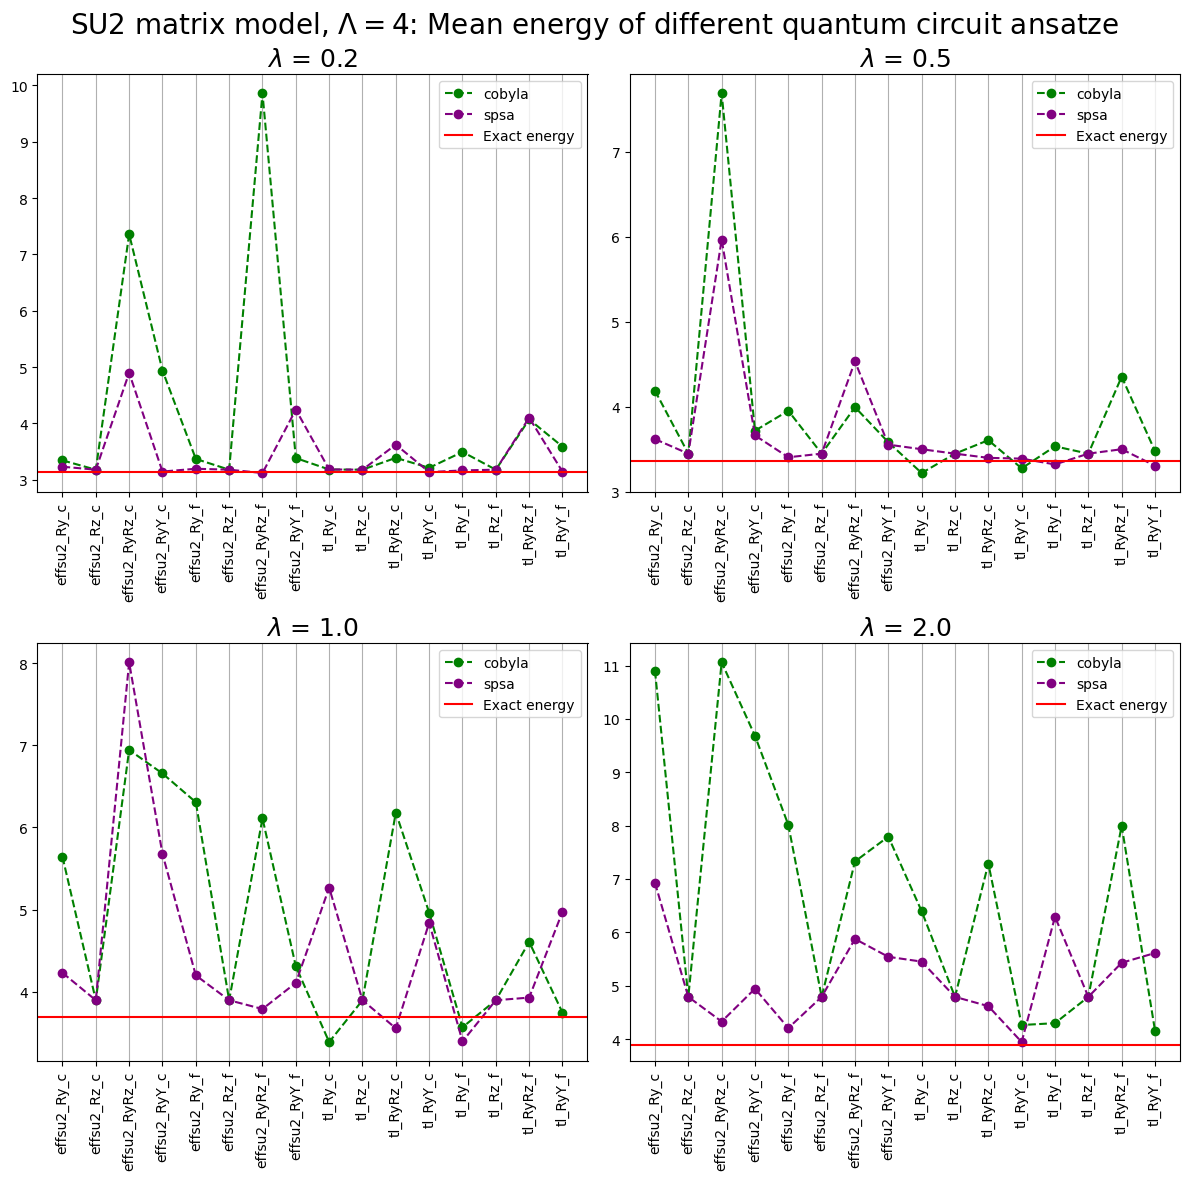

In [35]:
fig, ax = plt.subplots(2,2, figsize = (12,12), tight_layout= True)
ax[0,0].plot(df_l02['cobyla_values'], color='green', marker='o', linestyle='dashed', label='cobyla')
ax[0,0].plot(df_l02['spsa_values'], color='purple', marker='o', linestyle='dashed', label = 'spsa')
ax[0,0].axhline(E_02, color = 'red', label='Exact energy')
for tick in ax[0,0].get_xticklabels():
    tick.set_rotation(90)
ax[0,0].set_title('$\lambda$ = 0.2', fontsize = 18)
ax[0,0].legend()
ax[0,0].xaxis.grid(True)


ax[0,1].plot(df_l05['cobyla_values'],  color='green', marker='o', linestyle='dashed',label='cobyla')
ax[0,1].plot(df_l05['spsa_values'],  color='purple', marker='o', linestyle='dashed',label = 'spsa')
ax[0,1].axhline(E_05, color = 'red', label='Exact energy')
for tick in ax[0,1].get_xticklabels():
    tick.set_rotation(90)
ax[0,1].set_title('$\lambda$ = 0.5', fontsize = 18)
#ax[0,1].set_ylim([3.35, 3.42])
ax[0,1].xaxis.grid(True)
ax[0,1].legend()

ax[1,0].plot(df_l10['cobyla_values'],  color='green', marker='o', linestyle='dashed',label='cobyla')
ax[1,0].plot(df_l10['spsa_values'],  color='purple', marker='o', linestyle='dashed',label = 'spsa')
ax[1,0].axhline(E_10, color = 'red', label='Exact energy')
for tick in ax[1,0].get_xticklabels():
    tick.set_rotation(90)
ax[1,0].set_title('$\lambda$ = 1.0', fontsize = 18)
#ax[1,0].set_ylim([3.35, 3.42])
ax[1,0].xaxis.grid(True)
ax[1,0].legend()

ax[1,1].plot(df_l20['cobyla_values'],  color='green', marker='o', linestyle='dashed',label='cobyla')
ax[1,1].plot(df_l20['spsa_values'],  color='purple', marker='o', linestyle='dashed',label = 'spsa')
ax[1,1].axhline(E_20, color = 'red', label='Exact energy')
for tick in ax[1,1].get_xticklabels():
    tick.set_rotation(90)
ax[1,1].set_title('$\lambda$ = 2.0', fontsize = 18)
#ax[1,1].set_ylim([4.2, 4.8])
ax[1,1].xaxis.grid(True)
ax[1,1].legend(loc = 'upper right')

plt.suptitle('SU2 matrix model, $\Lambda=4$: Mean energy of different quantum circuit ansatze', fontsize = 20)
plt.savefig('L=4_all_ansatze_es_tl_1f.png')